In [56]:
import pandas as pd

# df_j2 = pd.read_csv("../test_sym_prop_j2.csv")
# df_j2_elliptical = pd.read_csv("../test_sym_prop_j2_elliptical.csv")
df_hohmann = pd.read_csv("../test_hohmann_transfer.csv")

df_hohmann_bi = pd.read_csv("../test_hohmann_transfer_bielliptic.csv")
df_sim = pd.read_csv("../test_simulation.csv")
df_sim_attitude = pd.read_csv("../test_simulation_attitude.csv")


In [57]:
df_sim.head()

scid          x          y          z             vx             vy  \
0  test  3900000.0  3900000.0  3900000.0  4.677500e-310  6.952620e-310   
1  test  3845430.0  3954070.0  3899740.0   0.000000e+00   0.000000e+00   
2  test  3790370.0  4007630.0  3898970.0   0.000000e+00   0.000000e+00   
3  test  3734830.0  4060670.0  3897690.0   0.000000e+00   0.000000e+00   
4  test  3678810.0  4113200.0  3895890.0   0.000000e+00   0.000000e+00   

              vz  q0  q1  q2  q3  
0  6.913530e-310   0   0   0   0  
1  4.940656e-324   0   0   0   0  
2  4.940656e-324   0   0   0   0  
3  4.940656e-324   0   0   0   0  
4  4.940656e-324   0   0   0   0

In [58]:
import matplotlib.pyplot as plt

def plot_states(df):
    fig = plt.figure()
    ax1 = fig.add_subplot(111, projection='3d')
    
    ax1.scatter(df.index, df["q0"], s=10, c='b', label='q0')
    ax1.scatter(df.index, df["q1"], s=10, c='r', label='q1')
    ax1.scatter(df.index, df["q2"], s=10, c='g', label='q2')
    ax1.scatter(df.index, df["q3"], s=10, c='g', label='q3')
   
    plt.legend(loc='upper left')
    plt.show()

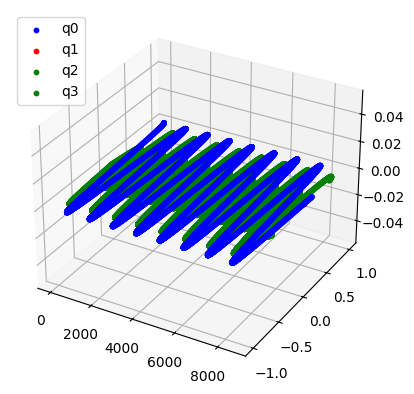

In [59]:
plot_states(df_sim_attitude)

In [60]:
import matplotlib.pyplot as plt

def plot_states_3d(df):
    fig = plt.figure()
    ax1 = fig.add_subplot(111, projection='3d')
    
    ax1.scatter(df.x, df.y, df.z)
    plt.show()

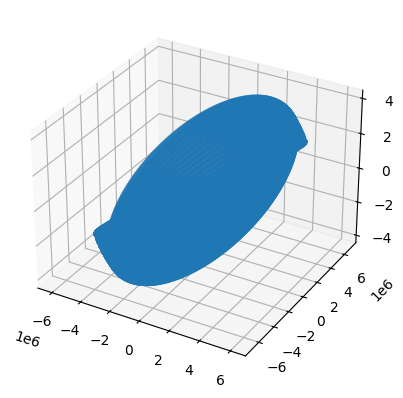

In [61]:
plot_states_3d(df_sim_attitude)

In [62]:
import numpy as np

from plotly.offline import iplot, init_notebook_mode
from plotly.graph_objs import Scatter3d, Surface

init_notebook_mode(connected=True)

def plot_orbit(df):
    x_km = df.x / 1000.0
    y_km = df.y / 1000.0
    z_km = df.z / 1000.0
    trace = Scatter3d(
        x=x_km, y=y_km, z=z_km,
        line=dict(
            color='#000000',
            width=5,
        ),
        mode="lines",
    )
    
    radius = 6378
    
    uu, vv = np.mgrid[0:2 * np.pi:20j, 0:np.pi:10j]
    xx = radius * np.cos(uu) * np.sin(vv)
    yy = radius * np.sin(uu) * np.sin(vv)
    zz = radius * np.cos(vv)
    
    planet = Surface(
        x=xx,
        y=yy,
        z=zz,
        cauto=False,
        cmin=1,
        cmax=1,
        colorscale=[[0, '#204a87'], [1, '#204a87']],
        showscale=False
        
    )
    
    
    data = [trace, planet]
    
    layout = dict(
        width=800,
        height=700,
        autosize=False,
        title='Orbit plot',
        scene=dict(
            xaxis=dict(
                gridcolor='rgb(255, 255, 255)',
                zerolinecolor='rgb(255, 255, 255)',
                showbackground=True,
                backgroundcolor='rgb(230, 230,230)'
            ),
            yaxis=dict(
                gridcolor='rgb(255, 255, 255)',
                zerolinecolor='rgb(255, 255, 255)',
                showbackground=True,
                backgroundcolor='rgb(230, 230,230)'
            ),
            zaxis=dict(
                gridcolor='rgb(255, 255, 255)',
                zerolinecolor='rgb(255, 255, 255)',
                showbackground=True,
                backgroundcolor='rgb(230, 230,230)'
            ),
            camera=dict(
                up=dict(
                    x=0,
                    y=0,
                    z=1
                ),
                eye=dict(
                    x=-1.7428,
                    y=1.0707,
                    z=0.7100,
                )
            ),
            
            # aspectratio = dict( x=1, y=1, z=1 ),
            aspectmode = 'data'
        ),
    )
    
    fig = dict(data=data, layout=layout)
    
    iplot(fig, filename='orbit-plot', image_height=700, validate=False)

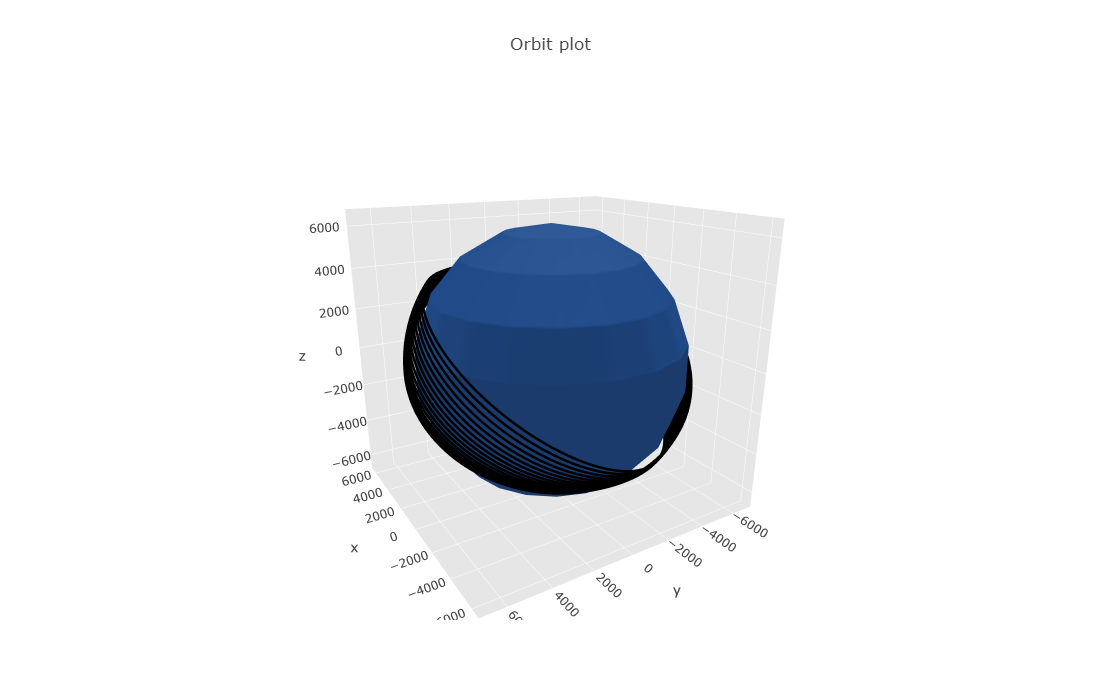

In [63]:
plot_orbit(df_sim_attitude)

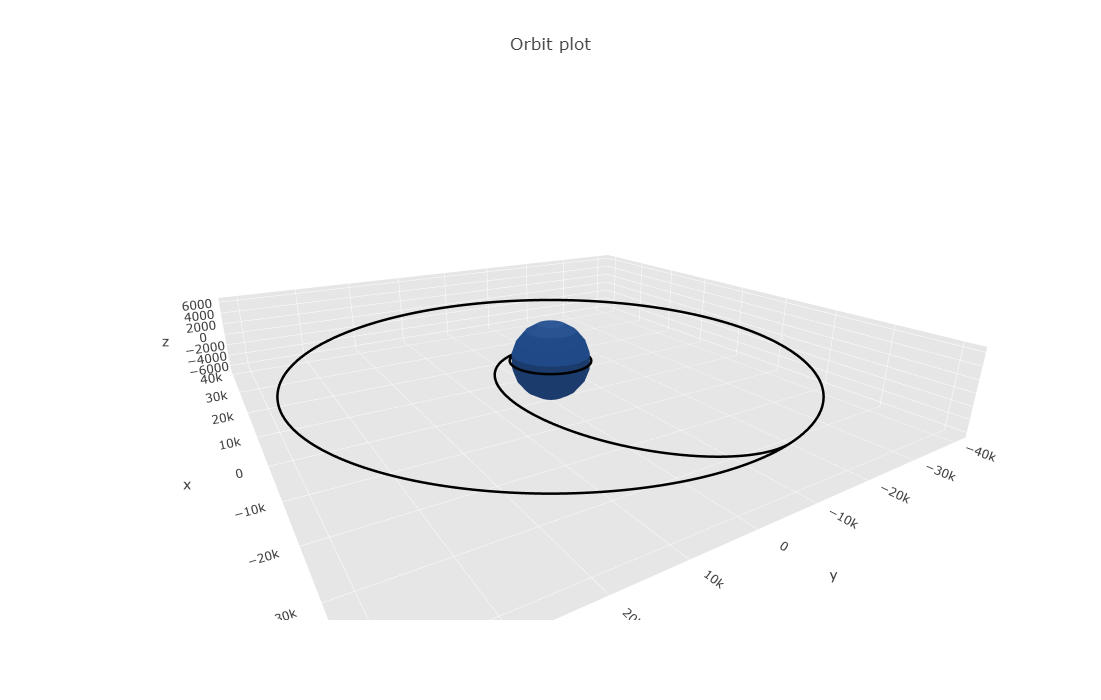

In [64]:
plot_orbit(df_hohmann)

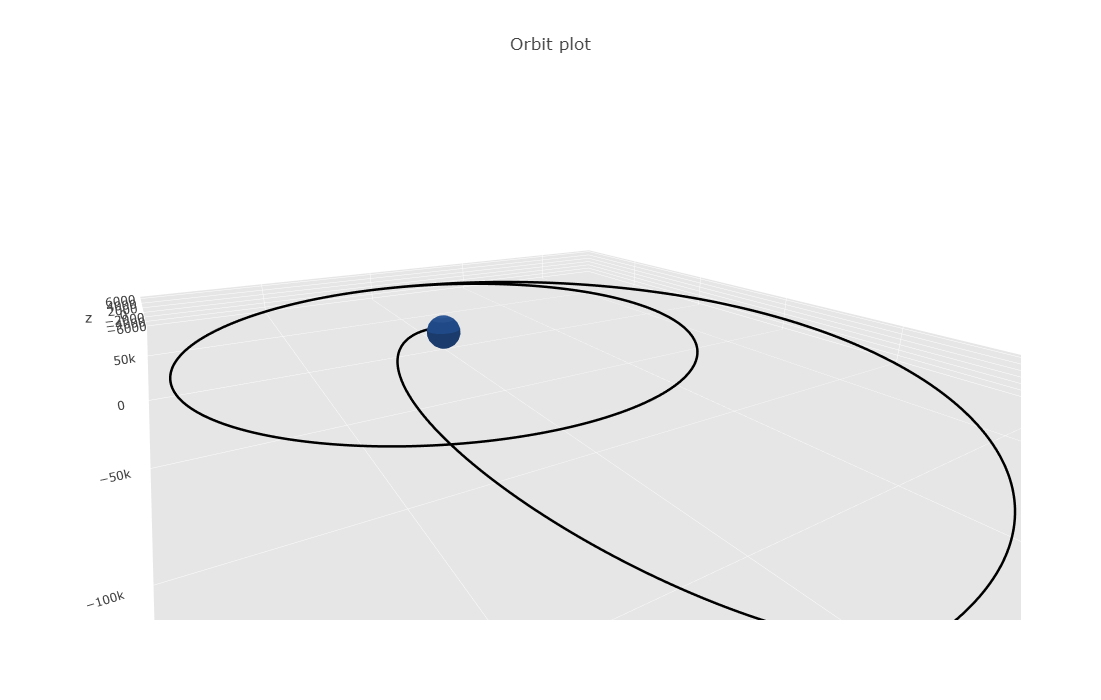

In [66]:
plot_orbit(df_hohmann_bi)